# <a id='toc1_'></a>[**Machine Learning**](#toc0_)

**Tabla de contenido**<a id='toc0_'></a>    
- [**Machine Learning**](#toc1_)    
  - [**Introducción**](#toc1_1_)    
  - [**Cargar y Visualizar los datos**](#toc1_2_)    
    - [**Región 0**](#toc1_2_1_)    
    - [**Región 1**](#toc1_2_2_)    
    - [**Región 2**](#toc1_2_3_)    
  - [**Preprocesamiento**](#toc1_3_)    
  - [**Modelado con Regresión Lineal**](#toc1_4_)    
  - [**Volumen de reservas**](#toc1_5_)    
  - [**Evaluación de los pozos**](#toc1_6_)    
  - [**Calculo de ganancias**](#toc1_7_)    
    - [**Bootstrapping**](#toc1_7_1_)    
  - [**Conclusiones:**](#toc1_8_)    

## <a id='toc1_1_'></a>[**Introducción**](#toc0_)

**Objetivo:** encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

**Plan de trabajo**
- Crear un modelo para predecir el volumen de reservas en pozos nuevos.
- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Al momento de seleccionar la región, se debe tomar en cuenta el beneficio y el riesgo que conlleva cada una.

**Condiciones**
- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.


## <a id='toc1_2_'></a>[**Cargar y Visualizar los datos**](#toc0_)

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Cargar y visualizar los datos
data = dict()

def view_the_data(region_number):
    
    '''
    La función hará lo siguiente por cada región:
    - Lectura de los datos
    - Primer contacto con los datos (describe, head,info)
    - Revisión de duplicados
    - Histogramas
    '''
    
    try:
        data[region_number] = pd.read_csv(f'../data/geo_data_{region_number}.csv')
        
        print('Describe:')
        display(data[region_number].describe())
        
        print('Dataframe:')
        display(data[region_number].head())
        
        print('Info:')
        data[region_number].info()
        
        print('\nDuplicates:')
        print(data[region_number].duplicated().sum())
        
        print('\nRegion', region_number, 'graphics:')
        data[region_number].hist(bins = 100, figsize = (15,8),)
        plt.show()
        
    except:
        data[region_number] = pd.read_csv(f'/datasets/geo_data_{region_number}.csv')
        
        print('Describe:')
        display(data[region_number].describe())
        
        print('Dataframe:')
        display(data[region_number].head())
        
        print('Info:')
        data[region_number].info()
        
        print('\nDuplicates:')
        print(data[region_number].duplicated().sum())
        
        print('\nRegion', region_number, 'graphics:')
        data[region_number].hist(bins = 100, figsize = (15,8),)
        plt.show()

### <a id='toc1_2_1_'></a>[**Región 0**](#toc0_)

Describe:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Dataframe:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Duplicates:
0

Region 0 graphics:


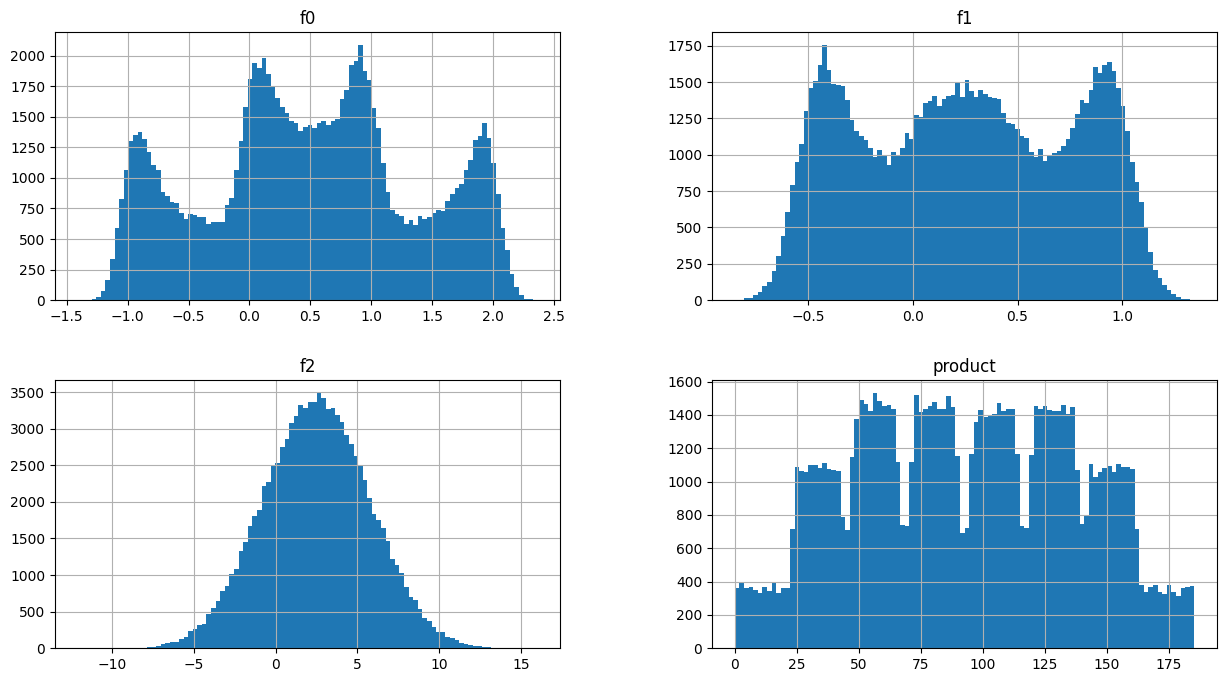

In [3]:
#Aplicación de la función en la región 0
view_the_data(0)

**Descripción de los datos**
- `id` — identificador único de pozo de petróleo
- `f0`, `f1`, `f2` — tres características significativas de los puntos.
- `product` — volumen de reservas en el pozo de petróleo (miles de barriles).

**Hallazgos de la región 0:**
- No hay duplicados ni valores ausentes.
- En los histogramas, solamente la columna `f2` tiene una distribución normal. Las demás columnas denotan estructuras muy particulares y similares a tener varios picos.

### <a id='toc1_2_2_'></a>[**Región 1**](#toc0_)

Describe:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Dataframe:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Duplicates:
0

Region 1 graphics:


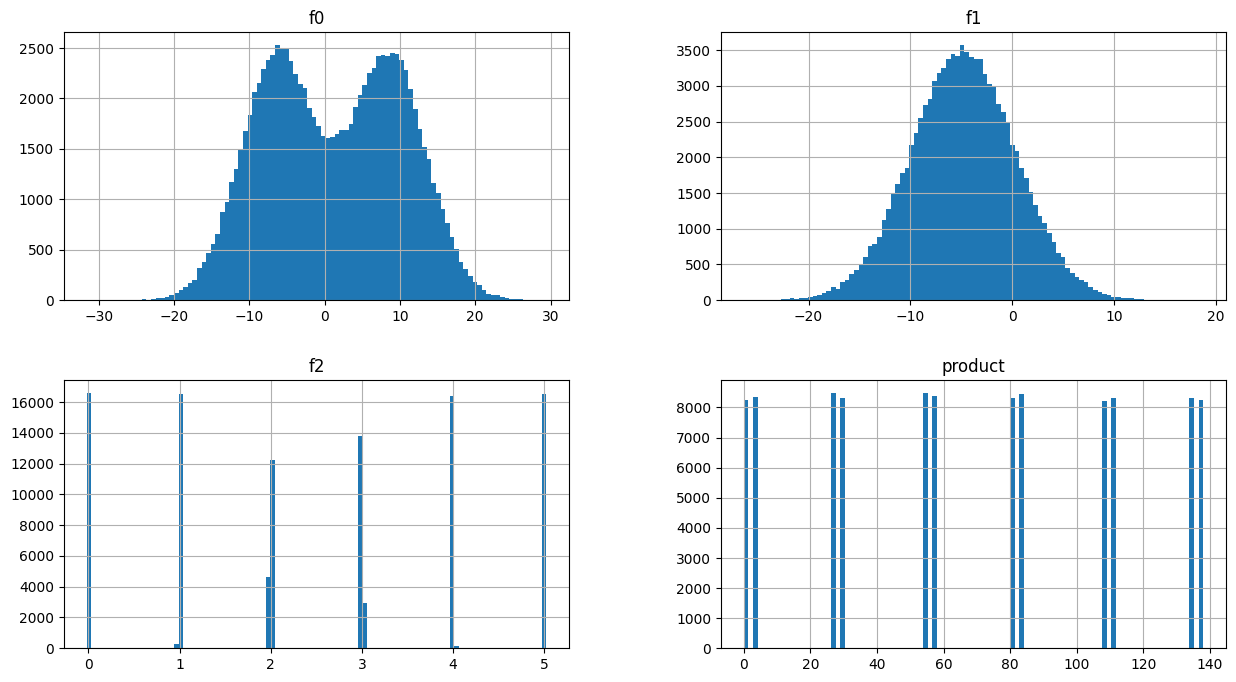

In [4]:
#Aplicación de la función en la región 1
view_the_data(1)

**Descripción de los datos**
- `id` — identificador único de pozo de petróleo
- `f0`, `f1`, `f2` — tres características significativas de los puntos.
- `product` — volumen de reservas en el pozo de petróleo (miles de barriles).

**Hallazgos de la región 1:**
- No hay duplicados ni valores ausentes.
- En los histogramas, solamente la columna `f0` tiene una distribución normal. La columna `f1` tiene una distribución de doble pico y las demás columnas denotan estructuras mucho más sectorizadas.

### <a id='toc1_2_3_'></a>[**Región 2**](#toc0_)

Describe:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Dataframe:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Duplicates:
0

Region 2 graphics:


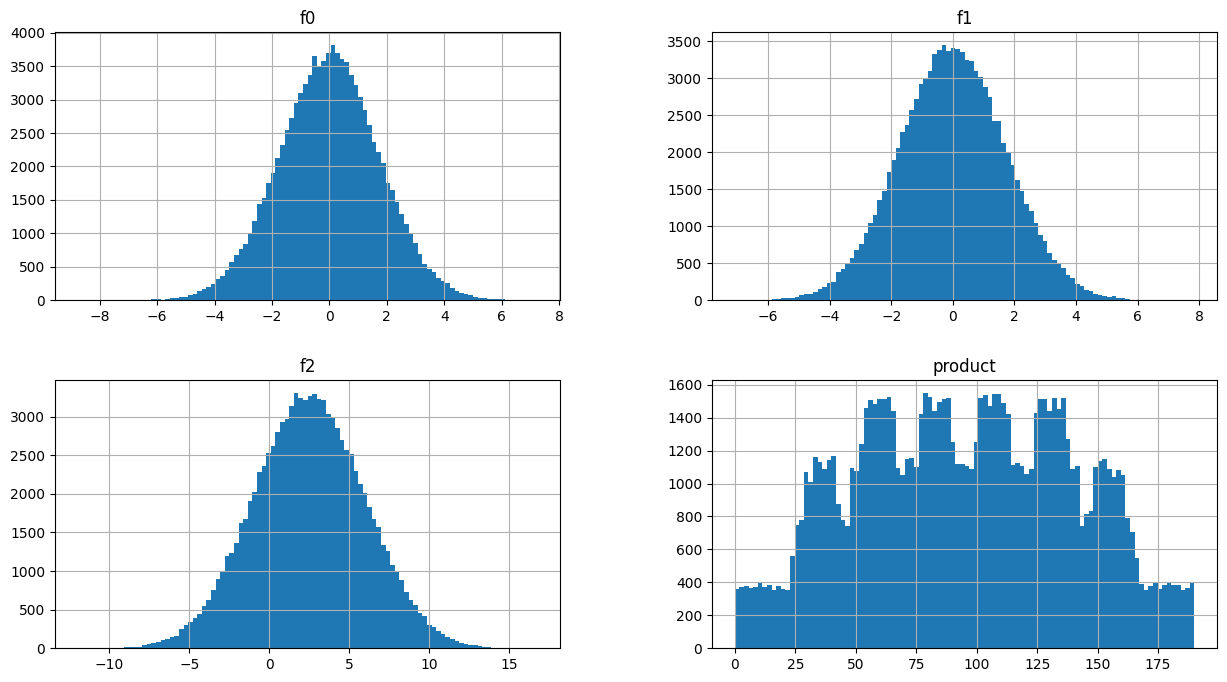

In [5]:
#Aplicación de la función en la región 2
view_the_data(2)

**Descripción de los datos**
- `id` — identificador único de pozo de petróleo
- `f0`, `f1`, `f2` — tres características significativas de los puntos.
- `product` — volumen de reservas en el pozo de petróleo (miles de barriles).

**Hallazgos de la región 2:**
- No hay duplicados ni valores ausentes.
- En los histogramas, las columnas `f0`, `f1` y `f2` tienen una distribución normal. Solamente la columna de `product` tiene una distribución de multiples picos.

Antes de comenzar con el modelado de los datos, la columna `id` no esta en valores numéricos, por ello lo ideal seria codificar dicha columna, sin embargo, como no aporta nada como característica para influir en la cantidad de producto, se eliminara.

In [6]:
#Visualizar columna id
data[0]['id'].unique()

array(['txEyH', '2acmU', '409Wp', ..., '3rnvd', '7kl59', '1CWhH'],
      dtype=object)

## <a id='toc1_3_'></a>[**Preprocesamiento**](#toc0_)

In [7]:
def drop_column(region_number):
    
    '''
    La función se encargara de eliminar la columna id de cada región
    '''
    
    data[region_number].drop(['id'], axis= 1, inplace = True)

In [8]:
#Eliminar columnas con la función 
for i in range(0,3):
    drop_column(i)

In [9]:
data[0].head()

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


## <a id='toc1_4_'></a>[**Modelado con Regresión Lineal**](#toc0_)

In [10]:
#Asignar un diccionario para cada variable
x = dict()
y = dict()
x_train = dict()
y_train = dict()
x_valid = dict()
y_valid = dict()
model = dict()
predict_v = dict()
RMSE = dict()

In [11]:
def modeling(region_number):
    
    '''
    La función se encargara por región de:
    - Separar la data en 75% para el entrenamiento y 25% para validación
    - Hacer un escaldado estándar en la data de entrenamiento
    - Extraer el modelo de regresión lineal, entrenar, hacer las predicciones y calcular el RMSE
    '''
    
    x[region_number] = data[region_number].drop(columns = ['product'])
    y[region_number] = data[region_number]['product']
    x_train[region_number], x_valid[region_number], y_train[region_number], y_valid[region_number] = train_test_split(x[region_number], y[region_number], random_state= 42, test_size= 0.25)
    
    scaler = StandardScaler()
    scaler.fit(x_train[region_number])
    x_train[region_number] = pd.DataFrame(scaler.transform(x_train[region_number]), index = x_train[region_number].index, columns = x_train[region_number].columns)
    x_valid[region_number] = pd.DataFrame(scaler.transform(x_valid[region_number]), index = x_valid[region_number].index, columns = x_valid[region_number].columns)
    
    model[region_number] = LinearRegression()
    model[region_number].fit(x_train[region_number], y_train[region_number])
    predict_v[region_number] = model[region_number].predict(x_valid[region_number])
    RMSE[region_number] = mean_squared_error(y_valid[region_number], predict_v[region_number])** 0.5
    
    print('Región', region_number)
    print('Promedio de stock de producto por pozo en las predicciones {} = {:.2f}'.format(region_number, predict_v[region_number].mean()))
    print('RMSE de la región {} = {:.2f}\n'.format(region_number, RMSE[region_number]))

In [12]:
#Aplicar la función
modeling(0)
modeling(1)
modeling(2)

Región 0
Promedio de stock de producto por pozo en las predicciones 0 = 92.40
RMSE de la región 0 = 37.76

Región 1
Promedio de stock de producto por pozo en las predicciones 1 = 68.71
RMSE de la región 1 = 0.89

Región 2
Promedio de stock de producto por pozo en las predicciones 2 = 94.77
RMSE de la región 2 = 40.15



In [13]:
#Dataframe con los datos obtenidos
df_predict = pd.DataFrame({
    'Regions' : [0,1,2],
    'mean_predictions' : [predict_v[0].mean(), predict_v[1].mean(), predict_v[2].mean()],
    'RMSE' : [RMSE[0], RMSE[1], RMSE[2]]
})

df_predict.sort_values('mean_predictions', ascending = False, inplace = True)
df_predict.reset_index(drop = True, inplace = True)
df_predict

,Regions,mean_predictions,RMSE
0,2,94.771024,40.145872
1,0,92.398800,37.756600
2,1,68.712878,0.890280


Teniendo en cuenta los resultados obtenidos en las medias y las diferencias entre los valores predichos y los reales por cada región, la región N°1 tiene menos volumen es sus reservas, pero son mas consistentes en relación con las regiones N° 0 y 2.

## <a id='toc1_5_'></a>[**Volumen de reservas**](#toc0_)

Siguiendo las condiciones indicadas el comienzo del proyecto, se tiene lo siguiente:

In [14]:
budget = 100_000_000 #Presupuesto para abrir los pozos
barrel = 4500 #Costo de una unidad de producto
max_points = 500 #Cantidad de pozos estudiados
points = 200 #Cantidad de pozos que se abrirán

In [15]:
#Calculo de volumen por pozo necesario para evitar perdidas
volume = budget / barrel
max_volume = int(volume / points)
print('El volumen necesario por pozo para no generar perdidas debe ser en promedio:', max_volume, 'de producto.')

El volumen necesario por pozo para no generar perdidas debe ser en promedio: 111 de producto.


## <a id='toc1_6_'></a>[**Evaluación de los pozos**](#toc0_)

In [16]:
def well_evaluation(region_number):
    
    '''
    La evaluación de los pozos de cada región se enfoca en:
    - Calcular el volumen máximo de los 200 pozos con mayor cantidad de producto
    - Estimar una ganancia general de la región
    - Estimar una ganancia media por pozo
    '''
    
    best_predictions = pd.Series(predict_v[region_number]).sort_values(ascending = False).reset_index(drop = True)
    best_predictions = best_predictions.loc[0:199]
    max_volume = round(best_predictions.sum(),2)
    profits = round((max_volume * barrel) - budget, 2)
    mean_profits = round(profits / points, 2)
    mean_volume = round(best_predictions.mean(), 2)
    
    print('Región', region_number,':')
    print('Sumatorio del volumen de los 200 pozos con mayor cantidad:', max_volume)
    print('Estimación de ganancia en la región:', profits)
    print('Ganancia media por pozo:', mean_profits)
    print('Volumen promedio por pozo:', mean_volume)

In [17]:
for i in range(0, 3):
    well_evaluation(i)
    print()

Región 0 :
Sumatorio del volumen de los 200 pozos con mayor cantidad: 30881.46
Estimación de ganancia en la región: 38966570.0
Ganancia media por pozo: 194832.85
Volumen promedio por pozo: 154.41

Región 1 :
Sumatorio del volumen de los 200 pozos con mayor cantidad: 27748.75
Estimación de ganancia en la región: 24869375.0
Ganancia media por pozo: 124346.88
Volumen promedio por pozo: 138.74

Región 2 :
Sumatorio del volumen de los 200 pozos con mayor cantidad: 29728.85
Estimación de ganancia en la región: 33779825.0
Ganancia media por pozo: 168899.12
Volumen promedio por pozo: 148.64



## <a id='toc1_7_'></a>[**Calculo de ganancias**](#toc0_)

In [18]:
def revenue(y,predictions,count):
    
    '''
    La función utilizara los datos indicados en las condiciones,
    junto con las predicciones y los datos objetivos para realizar el calculo
    '''
    
    predict_sorted = predictions.sort_values(ascending = False)
    selected = y[predict_sorted.index][:count]
    return (selected.sum() * barrel) - budget


Pero antes de aplicarla es necesario utilizar la técnica del bootstrapping para estimar la distribución estadística y construir intervalos de confianza del 95%.

### <a id='toc1_7_1_'></a>[**Bootstrapping**](#toc0_)

In [19]:
#Diccionarios de los resultados de la función
mean = dict()
confidence_interval_max = dict()
confidence_interval_min = dict()
probability_of_loss = dict()

def bootstrapping(region_number):
  
  '''
  El bootstrapping se aplica con los datos predichos por el modelo y se seleccionaran 500 valores aleatorios en diferentes muestras.
  Seguidamente, se aplica la función para calcular las ganancias de los 200 puntos con mayor cantidad de producto.
  Y finalmente se calcula:
  - La ganancia media
  - Los intervalos de confianza al 95%
  - La probabilidad y porcentaje de perdida
  '''

  predictions = pd.Series(predict_v[region_number], index = x_valid[region_number].index)
  
  loss = 0
  values = []
  state = np.random.RandomState(42)
  
  for i in range(1000):
    subsample_v = y_valid[region_number].sample(n = max_points, replace = True, random_state = state )
    subsample_p = pd.Series(predictions[subsample_v.index])
  
    profit = revenue(subsample_v, subsample_p, points)
    
    values.append(profit)
    
    mean[region_number] = np.mean(values)
    confidence_interval_max[region_number] = np.quantile(values, 0.025)
    confidence_interval_min[region_number] = np.quantile(values, 0.975)
    if profit < 0:
      loss += 1
  probability_of_loss[region_number] = (loss /max_points)
  
  return values

In [20]:
def conclusions(region_number):
    
    '''
    La función cumplirá el objetivo de:
    - Graficar los histogramas de los pozos seleccionados
    - Imprimir los resultados por región de los cálculos realizados en la función de bootstrapping
    '''
    
    fig = plt.figure(figsize=(10, 4))
    ax = sns.histplot(bootstrapping(region_number),
                      bins = 40,
                      ax = fig.add_subplot(),
            )
    plt.title(f'Distribution of profit in the region {region_number}', fontweight = 'bold')
    plt.ylabel('Count')
    plt.show()
    print('Ganancia media de {:.2f} millones.'.format(mean[region_number]))
    print('Intervalo de confianza del 95% entre: {:.2f} - {:.2f} millones.'.format(confidence_interval_max[region_number], confidence_interval_min[region_number]))
    print('Y con la probabilidad de perdida de {:.2f}, representando un porcentaje de {:.2%}.'.format(probability_of_loss[region_number], probability_of_loss[region_number]))

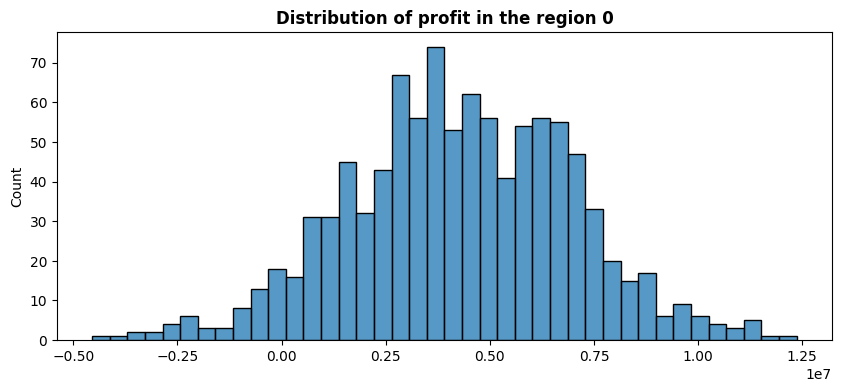

Ganancia media de 4278475.60 millones.
Intervalo de confianza del 95% entre: -972498.30 - 9542151.93 millones.
Y con la probabilidad de perdida de 0.11, representando un porcentaje de 11.00%.


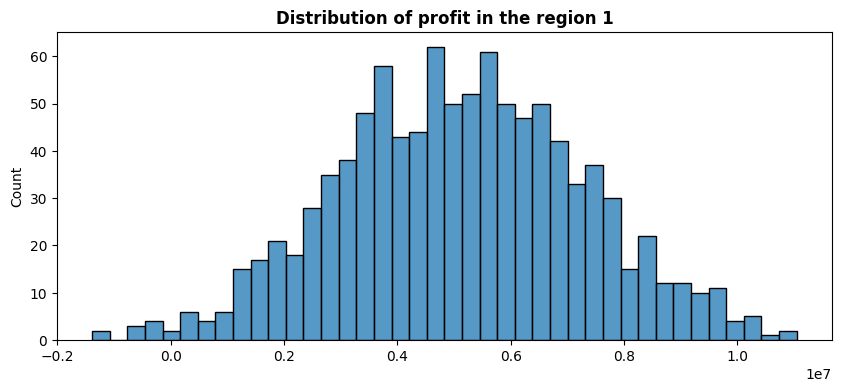

Ganancia media de 5113627.76 millones.
Intervalo de confianza del 95% entre: 988706.50 - 9407205.12 millones.
Y con la probabilidad de perdida de 0.02, representando un porcentaje de 1.80%.


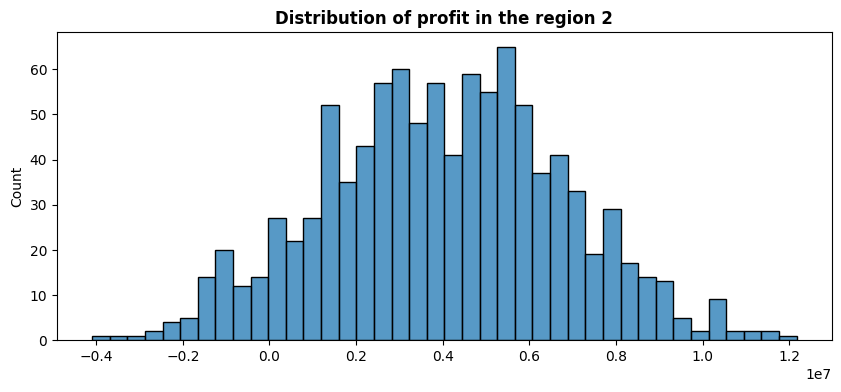

Ganancia media de 4025756.08 millones.
Intervalo de confianza del 95% entre: -1371622.25 - 9298875.28 millones.
Y con la probabilidad de perdida de 0.15, representando un porcentaje de 14.80%.


In [21]:
#Aplicar el bootstrapping con las gráficas
for i in range(0,3):
    conclusions(i)

## <a id='toc1_8_'></a>[**Conclusiones:**](#toc0_)

1. **Visualización de datos:** Se revisaron las bases de datos y se encontraron sin duplicados ni valores ausentes, pero sí con variación en la distribución de los datos, en los histogramas se perciben distribuciones normales, bi modal y multimodal. Y con la columna `id` que solo está presente para identificar la región.

2. **Preprocesamiento:** Aquí solo se eliminó la columna `id⁣`, puesto que para formar el modelo dicha columna siendo una string debía ser codificada, pero al no aportar nada en la cantidad de producto en cada área, se eliminó.

3. **Modelado:** Se separó en diversos pasos que fueron unificados en una función donde cumplía por región lo siguiente:
- Separar la data en un 75% para el entrenamiento y un 25% para la validación.
- Aplicar un escalado estándar para normalizar el valor de cada columna sobre el entrenamiento del modelo.
- Utilizar el modelo de LinearRegression con los datos de entrenamiento y realizar las predicciones con los datos de validación.
- Calcular la media de producto en cada pozo por región y el RMSE también por región.

Ahora bien, los resultados obtenidos en la media y el RMSE fueron los siguientes:

| Regions | mean_predictions | RMSE |
|---|---|---|
| 2 | 94.77 | 40.14 |
| 0 | 92.39 | 37.75 |
| 1 | 68.71 | 0.89 |

La región 2 es la que aloja más productos por pozo, pero es la que tiene una mayor dispersión de la cantidad real en comparación con las predicciones, siendo ese el significado de RMSE. Por otro lado, la región 1 es la que tiene menos cantidad de producto por pozo, pero sus predicciones son las más cercanas a las cantidades reales.

A partir de estos datos, tenemos una idea general de las regiones, pero no es suficiente para tomar una decisión. Por ello, es necesario hacer un cálculo de ganancias en cada región en función de la cantidad de producto para los 200 pozos que se requieren en la inversión. De esta forma, dicho cálculo indica con mayor severidad que región es viable sin generar pérdidas.
 

4. **Calculo de ganancia:** Para el calculo de ganancia por región se aplico:
- La técnica del Bootstrapping para realizar el calculo con diversas muestras y seleccionando los 200 pozos con mayor cantidad de producto.
- Ya teniendo los pozos, los cálculos fueron realizados con las condiciones indicadas al comienzo del proyecto.

![imagen](../img/calculo.png)

Los resultados de las ganancia fueron:

| Región | Ganancia media | Intervalo de confianza del 95% | Probabilidad de pérdida |
|---|---|---|---|
| 0 | 4278475.60 millones | -972498.30 - 9542151.93 millones | 0.11, 11.00% |
| 1 | 5113627.76 millones | 988706.50 - 9407205.12 millones | 0.02, 1.80% |
| 2 | 4025756.08 millones | -1371622.25 - 9298875.28 millones | 0.15, 14.80% |


5. **Conclusión Final:** 

- **Región 1:** es la región más rentable, tiene una una ganancia media de 5.113.627.76 millones de dólares. El intervalo de confianza del 95% de 988706.50 a 9407205.12 millones de dólares, lo que significa que la empresa tiene un 95% de confianza de que la ganancia real estará dentro de este rango y la probabilidad de pérdida es de 0.02, o 2%, es decir, una probabilidad bastante improbable en generar perdidas.

- **Región 0:** es la segunda región más rentable, con una ganancia media de 4278475.60 millones de dólares. El intervalo de confianza del 95% es de -972498.30 a 9542151.93 millones de dólares y la probabilidad de pérdida para esta región es de 0.11, o 11%, mucho mas elevada y es un riesgo bastante llamativo al momento de plantear realizar la inversión en dicha región.

- **Región 2:** seria la menos rentable, a pesar de ser la región con mayor cantidad de producto por pozo, con una ganancia media de 4.025.756.08 millones de dólares. El intervalo de confianza del 95% de -1371622.25 a 9298875.28 millones de dólares y La probabilidad de pérdida es de 0.15, o 14.8%.

En general, la empresa debería considerar invertir en la región 1, puesto que como ya fue mencionado es la región más rentable. Esto significa que, aunque esta región tiene la menor cantidad de producto por pozo, generaría una ganancia media de 961.511 millones más que las otras dos regiones.

Sin embargo, es importante tener en cuenta que estas son solo estimaciones. La ganancia real de un pozo de petróleo puede variar debido a una serie de factores, como el precio del petróleo, las condiciones del mercado y la eficiencia operativa.